# Titanic

Se adjunta un dataset sobre el desastre del Titanic para hacer ejercicios libres.

Algunos ejercicios que puedes llegar a realizar son:

* Ver el número de valores nulos
* Representar el porcentaje de filas con atributos nulos.
* Limpieza de columnas.
* Saber la edad mínima y máxima de las personas del barco.
* Conocer la mediana de las edades.
* Ver los precios (columna `fares`) más altos y bajos.
* Número de pasajeros embarcados (columna `Embarked`).
* Ver la distribución de sexos en las personas embarcadas.



In [82]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
Titanic = pd.read_csv(r'C:\Users\palom\Desktop\Diego\Bootcamp\Nueva carpeta\proyectos\titanic\titanic.csv')

In [84]:
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [85]:
print(Titanic.shape)
Titanic.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### valores atípicos

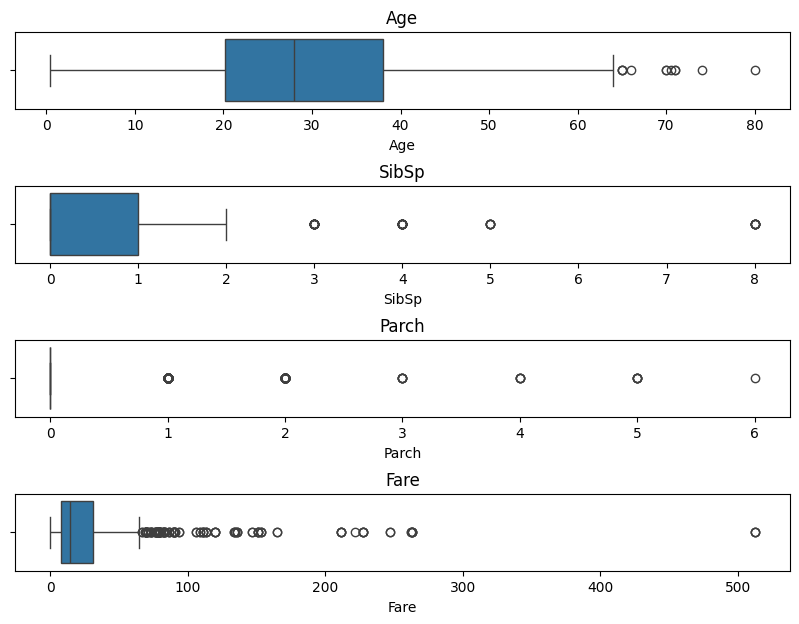

In [96]:
columnas = ['Age','SibSp','Parch','Fare']

fig,ax = plt.subplots(nrows=4,ncols=1,figsize=(10,7))
fig.subplots_adjust(hspace=1)

for i ,col in enumerate(columnas):
    sns.boxplot(x=col, data=Titanic,ax=ax[i])
    ax[i].set_title(col)

##### Valores nulos

In [97]:
titanic_nulos = Titanic.isnull().sum()
titanic_nulos

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## ANÁLISIS POR EDAD

In [92]:
Titanic.dropna()

# edad maxima 
edad_max = Titanic['Age'].max()
print(f'la edad maxima de los pasajero del titanic es : {edad_max} años')

# edad minima

edad_min = Titanic['Age'].min()
print(f'la edad minima de los pasajero del titanic es : {edad_min} años lo que equivale a 5 meses')

# mediana de la edad

mediana_edad = Titanic['Age'].median()
print(f'la mediana en la edad de los pasajero del titanic es : {mediana_edad} años')

#media edad

media_edad = Titanic['Age'].mean()
media_edad_redondeada = round(media_edad,2)
print(f'la edad media de los pasajero del titanic es : {media_edad_redondeada} años')


la edad maxima de los pasajero del titanic es : 80.0 años
la edad minima de los pasajero del titanic es : 0.42 años lo que equivale a 5 meses
la mediana en la edad de los pasajero del titanic es : 28.0 años
la edad media de los pasajero del titanic es : 29.7 años


In [105]:
print(Titanic['Sex'].value_counts().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of male      577
female    314
Name: Sex, dtype: int64>


##### EDAD DE LAS PERSONAS A BORDO DEL TITANIC

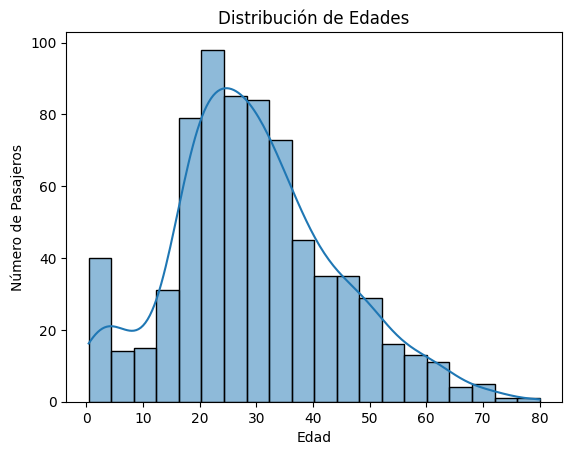

In [95]:
sns.histplot(Titanic['Age'].dropna(), bins=20, kde=True )
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Número de Pasajeros')
plt.show()

##### COMPARACION DE LA EDAD SEGUN LA CLASE SOCIAL

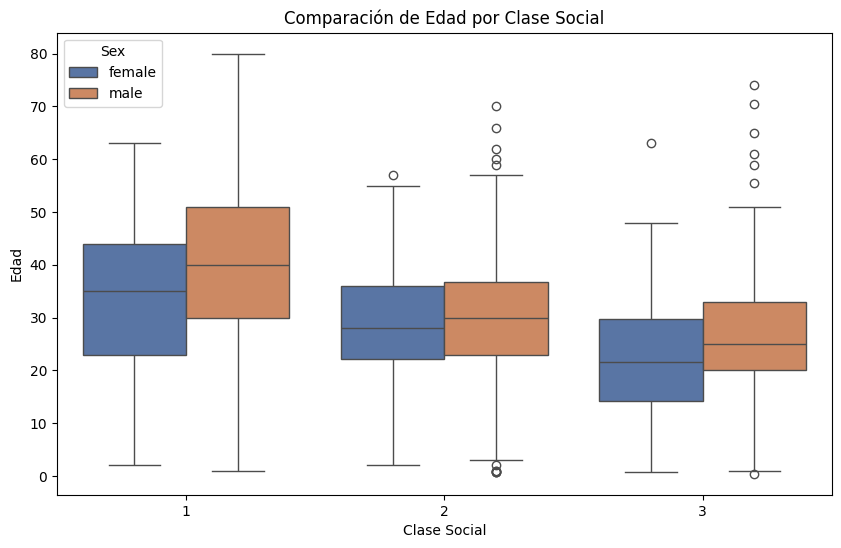

Las diferentes clases sociales influian mucho en la esperanza de vida de las personas


In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age',hue='Sex', data=Titanic, palette='deep')
plt.title('Comparación de Edad por Clase Social')
plt.xlabel('Clase Social')
plt.ylabel('Edad')
plt.show()

print('Las diferentes clases sociales influian mucho en la esperanza de vida de las personas')

## ANÁLISIS DE LOS PRECIOS

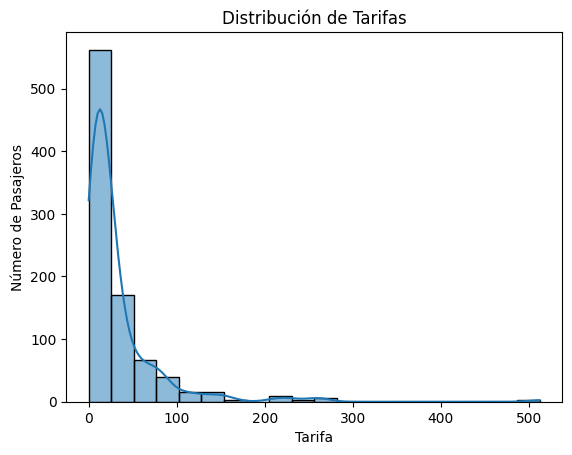

In [75]:
sns.histplot(Titanic['Fare'], bins=20, kde=True)
plt.title('Distribución de Tarifas')
plt.xlabel('Tarifa')
plt.ylabel('Número de Pasajeros')
plt.show()


##### PRECIO SEGUN LA CLASE SOCIAL

C:\Users\palom\AppData\Local\Temp\ipykernel_14692\1386488497.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Pclass', y='Fare', data=filtered_data, palette='deep', multiple='stack', shrink=0.8)


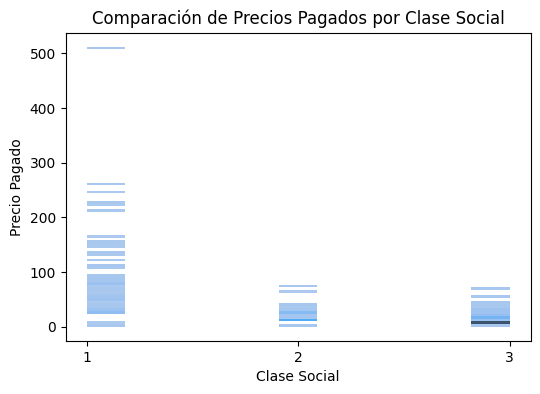

In [76]:
classes_to_plot = [1, 2, 3]
filtered_data = Titanic[Titanic['Pclass'].isin(classes_to_plot)]
plt.figure(figsize=(6,4))
sns.histplot(x='Pclass', y='Fare', data=filtered_data, palette='deep', multiple='stack', shrink=0.8)
plt.title('Comparación de Precios Pagados por Clase Social')
plt.xlabel('Clase Social')
plt.ylabel('Precio Pagado')
plt.xticks(classes_to_plot, labels=['1', '2', '3'])  # Mostrar solo las clases 1, 2 y 3 en el eje x
plt.show()

In [77]:
top_fares = Titanic.nlargest(3, 'Fare')

for index, row in top_fares.iterrows():
    print(f"Nombre: {row['Name']} | ID: {row['PassengerId']} | Precio del billete: {row['Fare']}")

print(F'Tendiendo en cuenta la epoca esos billetes en la actualidad costarian {row["Fare"]*117.7}')


Nombre: Ward, Miss. Anna | ID: 259 | Precio del billete: 512.3292
Nombre: Cardeza, Mr. Thomas Drake Martinez | ID: 680 | Precio del billete: 512.3292
Nombre: Lesurer, Mr. Gustave J | ID: 738 | Precio del billete: 512.3292
Tendiendo en cuenta la epoca esos billetes en la actualidad costarian 60301.14684


In [78]:
precio_min = Titanic['Fare'].sort_values().iloc[15] if len(Titanic['Fare']) > 1 else None
print(f'esta persona pago {precio_min} libras que ahora serían {precio_min * 117.7} ')
precio_min2 = Titanic['Fare'].sort_values().iloc[16] if len(Titanic['Fare']) > 1 else None
print(f'esta persona pago {precio_min2} libras que ahora serían {precio_min2 * 117.7} ')
precio_min3 = Titanic['Fare'].sort_values().iloc[17] if len(Titanic['Fare']) > 1 else None
print(f'esta persona pago {precio_min3} libras que ahora serían {precio_min3 * 117.7} ')

esta persona pago 4.0125 libras que ahora serían 472.27125 
esta persona pago 5.0 libras que ahora serían 588.5 
esta persona pago 6.2375 libras que ahora serían 734.15375 


##### COMPARACION DEL PRECION CON POR SEXO Y EDAD

C:\Users\palom\AppData\Local\Temp\ipykernel_14692\881261937.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sex', y='Fare', data=Titanic, palette=('steelblue','orange'), ax=axes[0])


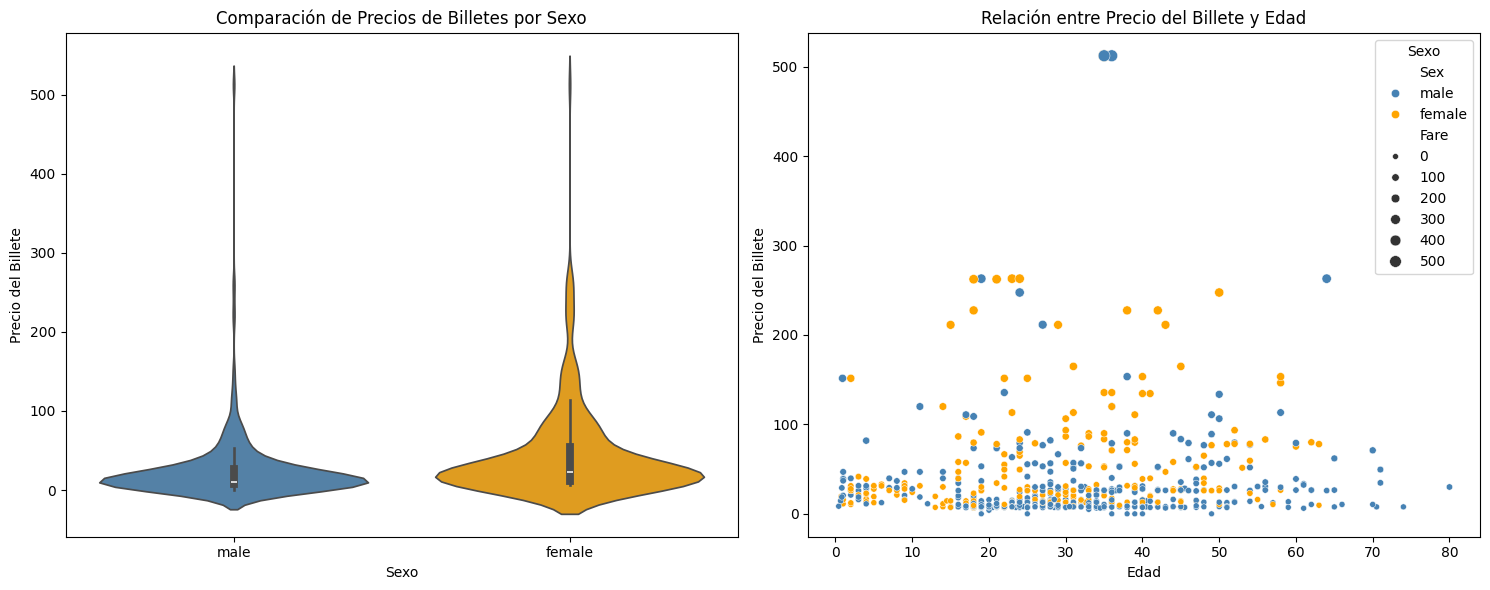

In [79]:
# Crear una figura con subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Gráfico de Violín para comparar precios de billetes por sexo
sns.violinplot(x='Sex', y='Fare', data=Titanic, palette=('steelblue','orange'), ax=axes[0])
axes[0].set_title('Comparación de Precios de Billetes por Sexo')
axes[0].set_xlabel('Sexo')
axes[0].set_ylabel('Precio del Billete')

# Gráfico de dispersión para comparar precio del billete con edad
sns.scatterplot(x='Age', y='Fare', data=Titanic, hue='Sex', palette=('steelblue','orange'), ax=axes[1], size ='Fare')
axes[1].set_title('Relación entre Precio del Billete y Edad')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Precio del Billete')
axes[1].legend(title='Sexo')

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


## ANÁLISIS DEL EMBARQUE

C:\Users\palom\AppData\Local\Temp\ipykernel_14692\692887649.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=porcentaje_por_embarque.index, y=porcentaje_por_embarque.values, palette='deep')


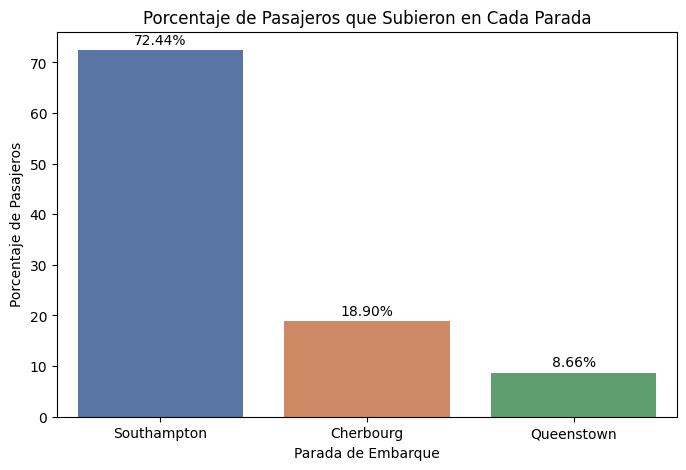

In [80]:
# Crear un diccionario de mapeo
mapeo_paradas = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}

# Aplicar el mapeo a la columna 'Embarked'
Titanic['ParadaCompleta'] = Titanic['Embarked'].map(mapeo_paradas)

# Calcular el porcentaje de pasajeros que subieron en cada parada
porcentaje_por_embarque = Titanic['ParadaCompleta'].value_counts(normalize=True) * 100

# Gráfico de barras para mostrar el porcentaje de pasajeros que subieron en cada parada
plt.figure(figsize=(8, 5))
sns.barplot(x=porcentaje_por_embarque.index, y=porcentaje_por_embarque.values, palette='deep')

# Anotar el porcentaje exacto sobre cada barra
for i, porcentaje in enumerate(porcentaje_por_embarque):
    plt.text(i, porcentaje + 0.6, f'{porcentaje:.2f}%', ha='center', va='bottom')

plt.title('Porcentaje de Pasajeros que Subieron en Cada Parada')
plt.xlabel('Parada de Embarque')
plt.ylabel('Porcentaje de Pasajeros')
plt.show()


In [81]:
orden_eje_x = ['Southampton', 'Cherbourg', 'Queenstown']
Titanic['ParadaCompleta'] = Titanic['Embarked'].map(mapeo_embarque)
tabla_contingencia = pd.crosstab(Titanic['ParadaCompleta'], Titanic['Pclass'])
plt.figure(figsize=(10, 6))
sns.barplot(x='ParadaCompleta', y='count', hue='Pclass', data=pd.DataFrame(tabla_contingencia.stack()).reset_index().rename(columns={0: 'count'}),palette=('deep'),order=orden_eje_x)
plt.title('Número de Pasajeros por Embarque y Clase Social')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Número de Pasajeros')
plt.show()
print('vemos cuales eran las paradas mas importantes ya que bajaron asta francia por un numero reducido de personas')


NameError: name 'mapeo_embarque' is not defined

## SUPERVIVIENTES

C:\Users\Diego Andrés\AppData\Local\Temp\ipykernel_14232\2665840591.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=porcentaje_supervivencia.index, y=porcentaje_supervivencia.values, order=orden_eje_x, palette='deep')


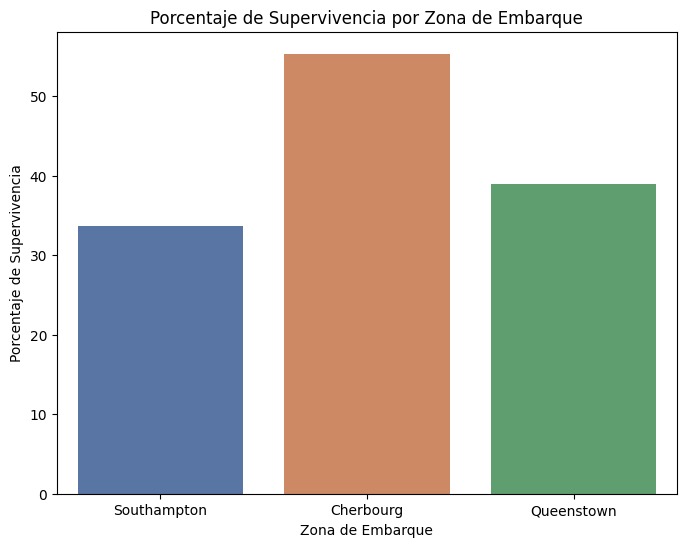

In [ ]:
mapeo_paradas_completas = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}

# Aplicar el mapeo a la columna 'Embarked'
Titanic['ParadaCompleta'] = Titanic['Embarked'].map(mapeo_paradas_completas)

# Calcular el porcentaje de supervivencia por zona de embarque
porcentaje_supervivencia = Titanic.groupby('ParadaCompleta')['Survived'].mean() * 100

# Definir el orden deseado en el eje x
orden_eje_x = ['Southampton', 'Cherbourg', 'Queenstown']

# Gráfico de barras para el porcentaje de supervivencia por zona de embarque con nombres completos y orden personalizado
plt.figure(figsize=(8, 6))
sns.barplot(x=porcentaje_supervivencia.index, y=porcentaje_supervivencia.values, order=orden_eje_x, palette='deep')
plt.title('Porcentaje de Supervivencia por Zona de Embarque')
plt.xlabel('Zona de Embarque')
plt.ylabel('Porcentaje de Supervivencia')
plt.show()

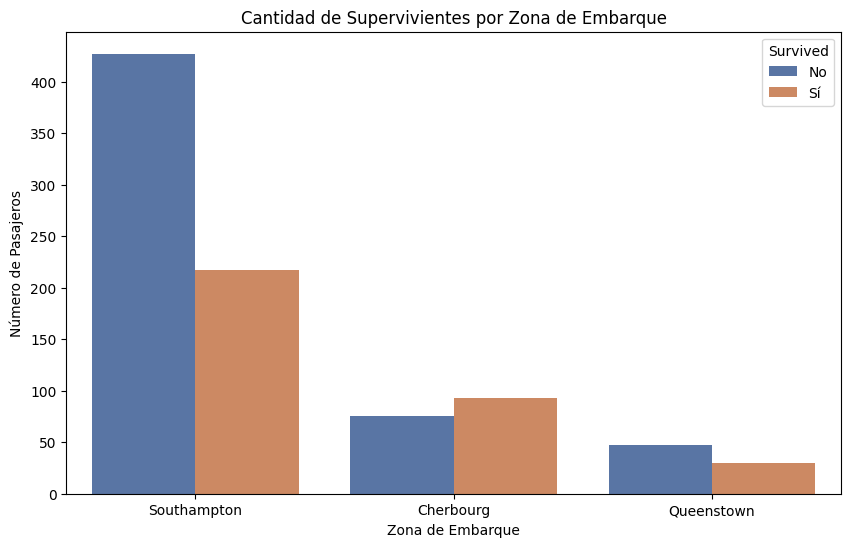

In [ ]:

mapeo_embarque = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}

# Aplicar el mapeo a la columna 'Embarked'
Titanic['ParadaCompleta'] = Titanic['Embarked'].map(mapeo_embarque)

# Crear un gráfico de barras apiladas
plt.figure(figsize=(10, 6))
sns.countplot(x='ParadaCompleta', hue='Survived', data=Titanic, palette='deep')
plt.title('Cantidad de Supervivientes por Zona de Embarque')
plt.xlabel('Zona de Embarque')
plt.ylabel('Número de Pasajeros')
plt.legend(title='Survived', labels=['No', 'Sí'])

# Mostrar el gráfico
plt.show()


C:\Users\Diego Andrés\AppData\Local\Temp\ipykernel_14232\3935260174.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=supervivientes, palette='deep', edgecolor='black', ax=axes[0])
C:\Users\Diego Andrés\AppData\Local\Temp\ipykernel_14232\3935260174.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=porcentaje_supervivientes.index, y=porcentaje_supervivientes.values, palette='deep', ax=axes[1])


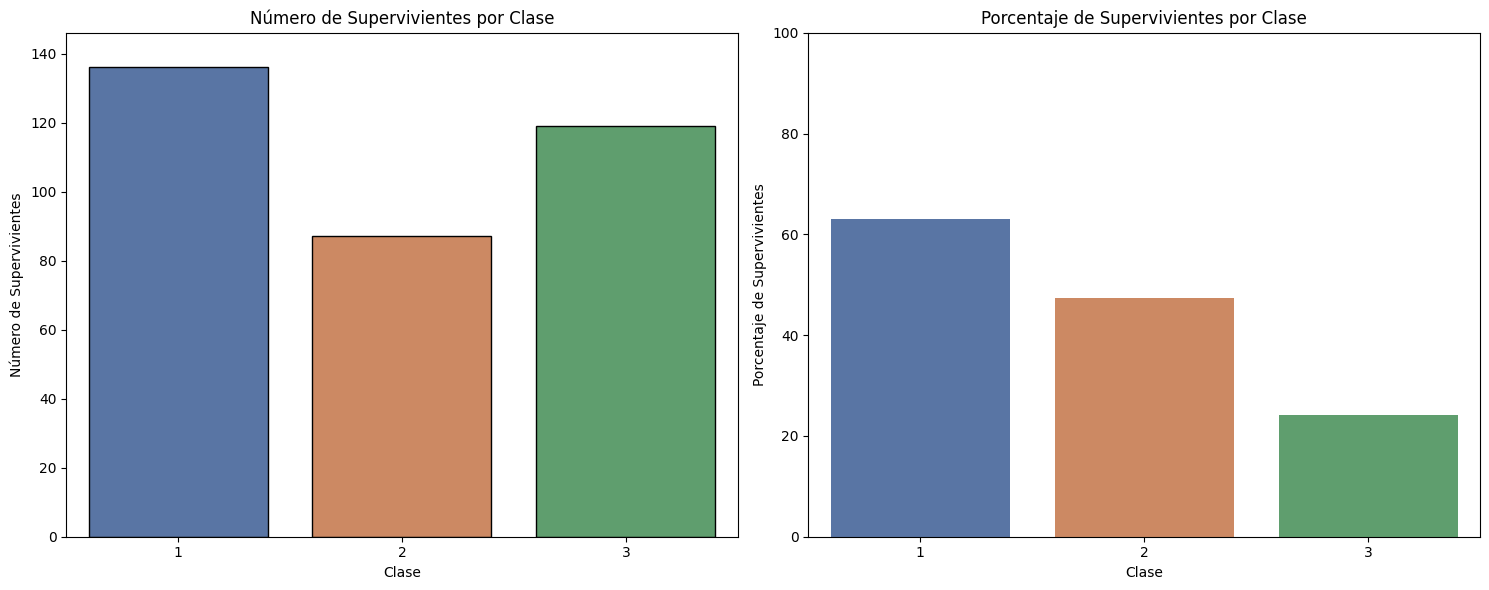

La celebre frase de mujeres y niños primero pierda valor al ver esta grafica ya que la clase siempre va a estar presente


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Subgráfico 1: Número de supervivientes por clase
sns.countplot(x='Pclass', data=supervivientes, palette='deep', edgecolor='black', ax=axes[0])
axes[0].set_title('Número de Supervivientes por Clase')
axes[0].set_xlabel('Clase')
axes[0].set_ylabel('Número de Supervivientes')

# Subgráfico 2: Porcentaje de supervivientes por clase
total_pasajeros_por_clase = Titanic.groupby('Pclass').size()
porcentaje_supervivientes = (supervivientes['Pclass'].value_counts() / total_pasajeros_por_clase) * 100

sns.barplot(x=porcentaje_supervivientes.index, y=porcentaje_supervivientes.values, palette='deep', ax=axes[1])
axes[1].set_title('Porcentaje de Supervivientes por Clase')
axes[1].set_xlabel('Clase')
axes[1].set_ylabel('Porcentaje de Supervivientes')

# Establecer el mismo rango en el eje y para ambos subgráficos
axes[0].set_ylim([0, max(supervivientes['Pclass'].value_counts()) + 10])
axes[1].set_ylim([0, 100])

# Ajustar el diseño de la figura
plt.tight_layout()

# Mostrar la figura
plt.show()


TypeError: Data source must be a DataFrame or Mapping, not <class 'str'>.

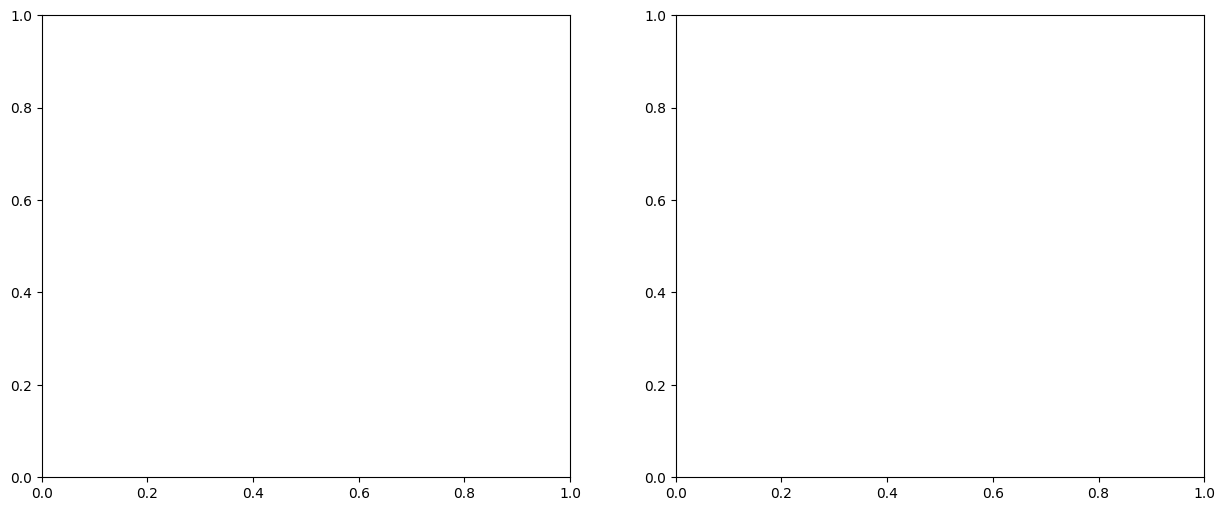

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Subgráfico 1: Número de supervivientes por sexo
sns.countplot(x='Sex', data='Survived', palette='deep', edgecolor='black', ax=axes[0])
axes[0].set_title('Número de Supervivientes por Sexo')
axes[0].set_xlabel('Sexo')
axes[0].set_ylabel('Número de Supervivientes')

# Subgráfico 2: Porcentaje de supervivientes por sexo
total_pasajeros_por_sexo = Titanic.groupby('Sex').size()
porcentaje_supervivientes_sexo = (supervivientes['Sex'].value_counts() / total_pasajeros_por_sexo) * 100

sns.barplot(x=porcentaje_supervivientes_sexo.index, y=porcentaje_supervivientes_sexo.values, palette='deep', ax=axes[1])
axes[1].set_title('Porcentaje de Supervivientes por Sexo')
axes[1].set_xlabel('Sexo')
axes[1].set_ylabel('Porcentaje de Supervivientes')

# Establecer el mismo rango en el eje y para ambos subgráficos
axes[0].set_ylim([0, max(supervivientes['Sex'].value_counts()) + 10])
axes[1].set_ylim([0, 100])

# Ajustar el diseño de la figura
plt.tight_layout()

# Mostrar la figura
plt.show()

print(Titanic['Sex'].value_counts())